In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# a = np.random.random((16, 16))
# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()

In [122]:
pitches = pd.read_csv("../alldata.csv")
new_pitches = pitches.loc[pitches["away_team"] == "hou"]
x_values = new_pitches.px.values
z_values = new_pitches.pz.values

In [123]:
x_z_values = list(zip(x_values, z_values))

In [124]:
x_z_values

[(-0.163, 2.446),
 (0.778, 2.99),
 (1.024, 2.181),
 (0.996, 1.921),
 (-0.273, 1.361),
 (0.974, 2.877),
 (-0.754, 2.437),
 (0.5479999999999999, 3.38),
 (0.659, 3.187),
 (0.006999999999999999, 2.999),
 (0.152, 2.43),
 (-0.569, 3.645),
 (-1.065, 2.2030000000000003),
 (-1.673, 2.099),
 (0.203, 2.039),
 (0.051, 2.929),
 (-0.908, 3.345),
 (-0.675, 2.323),
 (0.2, 2.008),
 (0.938, 2.357),
 (-0.642, 3.896),
 (0.6629999999999999, 2.434),
 (0.7040000000000001, 3.994),
 (0.07400000000000001, -0.046),
 (-0.906, 2.333),
 (0.386, 2.904),
 (-0.109, 2.551),
 (-0.551, 1.633),
 (0.142, 2.269),
 (-0.843, 1.941),
 (1.342, 1.091),
 (-1.341, 1.675),
 (-0.591, 0.883),
 (-1.357, 2.513),
 (-1.004, 1.857),
 (-0.192, 3.148),
 (-1.43, 2.901),
 (0.388, 4.062),
 (-1.108, 2.915),
 (-1.198, 1.7519999999999998),
 (-0.7, 2.728),
 (-0.685, 2.737),
 (0.848, 2.764),
 (-0.77, 3.157),
 (-0.202, 1.582),
 (-2.461, 2.474),
 (0.482, 2.198),
 (-1.126, 0.615),
 (0.913, 2.003),
 (0.684, 1.463),
 (-0.403, 2.946),
 (-0.753, 2.465),
 

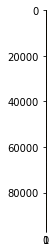

In [39]:
plt.imshow(x_z_values, cmap='hot', interpolation='nearest')
plt.show()

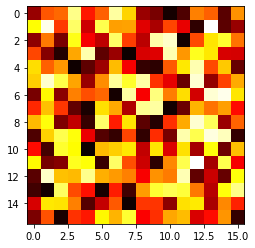

In [28]:
a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [43]:
a

array([[0.21717258, 0.49857434, 0.52309467, 0.88102123, 0.40578273,
        0.5142601 , 0.90577861, 0.68383411, 0.22188294, 0.1725769 ,
        0.024625  , 0.11089409, 0.55910469, 0.51227221, 0.12524909,
        0.58461201],
       [0.7476155 , 0.97783193, 0.45591294, 0.84538432, 0.29720323,
        0.82431713, 0.6051283 , 0.60783086, 0.32543942, 0.24691804,
        0.47024977, 0.33807681, 0.0621555 , 0.99953773, 0.12852072,
        0.21957519],
       [0.20128302, 0.54812207, 0.17123844, 0.76878124, 0.35629984,
        0.27351063, 0.84720041, 0.46350173, 0.26936697, 0.91126634,
        0.94479672, 0.01928054, 0.47761387, 0.71191887, 0.79155054,
        0.54073194],
       [0.47411728, 0.18894746, 0.04844146, 0.6162305 , 0.91556102,
        0.13217157, 0.22203645, 0.0132845 , 0.31036245, 0.32179866,
        0.92048672, 0.59565357, 0.7756848 , 0.71579691, 0.31120834,
        0.30713981],
       [0.70037298, 0.51322665, 0.59239772, 0.01631902, 0.1314392 ,
        0.22576954, 0.64996725, 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [240]:
pitches2 = pd.read_csv("../pitches.csv")
atbats = pd.read_csv("../atbats.csv")
games = pd.read_csv("../games.csv")
pitches2 = pitches2.loc[:, ['code', 'pitch_type', 'ab_id', 'b_count', 's_count', 'outs', 'on_1b', 'on_2b', 'on_3b']]

In [241]:
atbats = atbats.loc[:, ['g_id', 'ab_id', 'top']]
games = games.loc[:, ['away_team', 'g_id', 'home_team']]

In [242]:
pitches_atbats = pd.merge(pitches2, atbats)

In [248]:
all_data = pd.merge(pitches_atbats, games)
all_data

code pitch_type         ab_id  b_count  s_count  outs  on_1b  on_2b  \
0          C         FF  2.015000e+09      0.0      0.0   0.0    0.0    0.0   
1          S         FF  2.015000e+09      0.0      1.0   0.0    0.0    0.0   
2          F         FF  2.015000e+09      0.0      2.0   0.0    0.0    0.0   
3          B         FF  2.015000e+09      0.0      2.0   0.0    0.0    0.0   
4          B         CU  2.015000e+09      1.0      2.0   0.0    0.0    0.0   
...      ...        ...           ...      ...      ...   ...    ...    ...   
2867149    D         SL  2.018186e+09      3.0      2.0   2.0    0.0    0.0   
2867150    B         FF  2.018186e+09      0.0      0.0   2.0    1.0    0.0   
2867151    F         FF  2.018186e+09      1.0      0.0   2.0    0.0    1.0   
2867152    S         FF  2.018186e+09      1.0      1.0   2.0    0.0    1.0   
2867153    X         FF  2.018186e+09      1.0      2.0   2.0    0.0    1.0   

         on_3b       g_id    top away_team home_team  
0          0.0  201500001   True       sln       chn  
1          0.0  201500001   True       sln       chn  
2          0.0  201500001   True       sln       chn  
3          0.0  201500001   True       sln       chn  
4          0.0  201500001   True       sln       chn  
...        ...        ...    ...       ...       ...  
2867149    0.0  201802431  False       mil       chn  
2867150    0.0  201802431  False       mil       chn  
2867151    0.0  201802431  False       mil       chn  
2867152    0.0  201802431  False       mil       chn  
2867153    0.0  201802431  False       mil       chn  

[2867154 rows x 13 columns]

In [214]:
import re
import seaborn as sns

In [337]:
hou_201516_away = all_data.loc[all_data["away_team"] == "hou"].loc[all_data["g_id"] < 201700001].loc[all_data["top"] == True]
hou_201516_home = all_data.loc[all_data["home_team"] == "hou"].loc[all_data["g_id"] < 201700001].loc[all_data["top"] == False]
print(len(hou_201516_away))
hou_201516_away.loc[:,"code":]
# hou_201516_home.loc[hou_201516_home['code'] == 'B', 'code'] = 1
# hou_201516_home.loc[hou_201516_home['code'] == 1].head()
# hou_201516 = pd.concat([hou_201516_away, hou_201516_home])

24266


code pitch_type         ab_id  b_count  s_count  outs  on_1b  on_2b  \
14143      D         CH  2.015004e+09      0.0      0.0   0.0    0.0    0.0   
14144      S         CH  2.015004e+09      0.0      0.0   0.0    1.0    0.0   
14145      X         CH  2.015004e+09      0.0      1.0   0.0    1.0    0.0   
14146      C         CH  2.015004e+09      0.0      0.0   1.0    0.0    1.0   
14147      B         KC  2.015004e+09      0.0      1.0   1.0    0.0    1.0   
...      ...        ...           ...      ...      ...   ...    ...    ...   
1415118   *B         CU  2.016184e+09      0.0      1.0   1.0    1.0    1.0   
1415119    S         FC  2.016184e+09      1.0      1.0   1.0    1.0    1.0   
1415120    F         FF  2.016184e+09      1.0      2.0   1.0    1.0    1.0   
1415121    C         FF  2.016184e+09      1.0      2.0   1.0    1.0    1.0   
1415122    X         FF  2.016184e+09      0.0      0.0   2.0    1.0    1.0   

         on_3b       g_id   top away_team home_team  
14143      0.0  201500050  True       hou       tex  
14144      0.0  201500050  True       hou       tex  
14145      0.0  201500050  True       hou       tex  
14146      0.0  201500050  True       hou       tex  
14147      0.0  201500050  True       hou       tex  
...        ...        ...   ...       ...       ...  
1415118    0.0  201602418  True       hou       ana  
1415119    0.0  201602418  True       hou       ana  
1415120    0.0  201602418  True       hou       ana  
1415121    0.0  201602418  True       hou       ana  
1415122    0.0  201602418  True       hou       ana  

[24266 rows x 13 columns]

In [257]:
# hou_201516_away1 = hou_201516_away.loc[hou_201516_away["code"].isin(['X'])]
# print(len(hou_201516_away1))
# hou_201516_away2 = hou_201516_away.loc[hou_201516_away["code"].isin(['B'])]
# print(len(hou_201516_away2))

8197

In [338]:
hou_201516_away = hou_201516_away.loc[hou_201516_away["code"].isin(['X', 'D', 'E'])]

hou_201516_home = hou_201516_home.loc[hou_201516_home["code"].isin(['X', 'D', 'E'])]

In [339]:
hou_201516_away.loc[:,"code":]

code pitch_type         ab_id  b_count  s_count  outs  on_1b  on_2b  \
14143      D         CH  2.015004e+09      0.0      0.0   0.0    0.0    0.0   
14145      X         CH  2.015004e+09      0.0      1.0   0.0    1.0    0.0   
14149      E         CH  2.015004e+09      1.0      2.0   2.0    0.0    0.0   
14151      X         CH  2.015004e+09      1.0      0.0   2.0    0.0    0.0   
14162      D         FF  2.015004e+09      0.0      0.0   0.0    0.0    0.0   
...      ...        ...           ...      ...      ...   ...    ...    ...   
1415097    X         FF  2.016184e+09      0.0      1.0   2.0    0.0    0.0   
1415108    D         FC  2.016184e+09      1.0      0.0   0.0    0.0    0.0   
1415115    X         CU  2.016184e+09      2.0      2.0   0.0    1.0    0.0   
1415116    D         FF  2.016184e+09      0.0      0.0   1.0    1.0    0.0   
1415122    X         FF  2.016184e+09      0.0      0.0   2.0    1.0    1.0   

         on_3b       g_id   top away_team home_team  
14143      0.0  201500050  True       hou       tex  
14145      0.0  201500050  True       hou       tex  
14149      0.0  201500050  True       hou       tex  
14151      0.0  201500050  True       hou       tex  
14162      0.0  201500050  True       hou       tex  
...        ...        ...   ...       ...       ...  
1415097    0.0  201602418  True       hou       ana  
1415108    0.0  201602418  True       hou       ana  
1415115    0.0  201602418  True       hou       ana  
1415116    0.0  201602418  True       hou       ana  
1415122    0.0  201602418  True       hou       ana  

[4331 rows x 13 columns]

In [340]:
hou_201516_away.tail()
len(hou_201516_away)
hou_201516_away.loc[:,"code":]

code pitch_type         ab_id  b_count  s_count  outs  on_1b  on_2b  \
14143      D         CH  2.015004e+09      0.0      0.0   0.0    0.0    0.0   
14145      X         CH  2.015004e+09      0.0      1.0   0.0    1.0    0.0   
14149      E         CH  2.015004e+09      1.0      2.0   2.0    0.0    0.0   
14151      X         CH  2.015004e+09      1.0      0.0   2.0    0.0    0.0   
14162      D         FF  2.015004e+09      0.0      0.0   0.0    0.0    0.0   
...      ...        ...           ...      ...      ...   ...    ...    ...   
1415097    X         FF  2.016184e+09      0.0      1.0   2.0    0.0    0.0   
1415108    D         FC  2.016184e+09      1.0      0.0   0.0    0.0    0.0   
1415115    X         CU  2.016184e+09      2.0      2.0   0.0    1.0    0.0   
1415116    D         FF  2.016184e+09      0.0      0.0   1.0    1.0    0.0   
1415122    X         FF  2.016184e+09      0.0      0.0   2.0    1.0    1.0   

         on_3b       g_id   top away_team home_team  
14143      0.0  201500050  True       hou       tex  
14145      0.0  201500050  True       hou       tex  
14149      0.0  201500050  True       hou       tex  
14151      0.0  201500050  True       hou       tex  
14162      0.0  201500050  True       hou       tex  
...        ...        ...   ...       ...       ...  
1415097    0.0  201602418  True       hou       ana  
1415108    0.0  201602418  True       hou       ana  
1415115    0.0  201602418  True       hou       ana  
1415116    0.0  201602418  True       hou       ana  
1415122    0.0  201602418  True       hou       ana  

[4331 rows x 13 columns]

In [341]:
hou_201516_away.loc[hou_201516_away['pitch_type'] == 'FF', 'pitch_type'] = 0
hou_201516_away.loc[hou_201516_away['pitch_type'] == 'FT', 'pitch_type'] = 0
hou_201516_away.loc[hou_201516_away['pitch_type'] == 'FC', 'pitch_type'] = 0
hou_201516_away.loc[hou_201516_away['pitch_type'] != 0, 'pitch_type'] = 1
hou_201516_away.loc[hou_201516_away['code'] == 'D', 'code'] = 1
hou_201516_away.loc[hou_201516_away['code'] == 'E', 'code'] = 1
hou_201516_away.loc[hou_201516_away['code'] == 'X', 'code'] = 0

hou_201516_home.loc[hou_201516_home['pitch_type'] == 'FF', 'pitch_type'] = 0
hou_201516_home.loc[hou_201516_home['pitch_type'] == 'FT', 'pitch_type'] = 0
hou_201516_home.loc[hou_201516_home['pitch_type'] == 'FC', 'pitch_type'] = 0
hou_201516_home.loc[hou_201516_home['pitch_type'] != 0, 'pitch_type'] = 1
hou_201516_home.loc[hou_201516_home['code'] == 'D', 'code'] = 1
hou_201516_home.loc[hou_201516_home['code'] == 'E', 'code'] = 1
hou_201516_home.loc[hou_201516_home['code'] == 'X', 'code'] = 0

# 1 is offspeed, and 0 is fastball

In [342]:
x_away = hou_201516_away.drop(['code','ab_id', 'g_id', 'top', 'away_team', 'home_team'], 1)
y_away = hou_201516_away['code']
y_away.sum()

1555

In [353]:
x_train_away, x_test_away, y_train_away, y_test_away = train_test_split(x_away, y_away, test_size=0.2, random_state=1)
logmodel_away = LogisticRegression()
logmodel_away.fit(x_train_away, y_train_away)
 
predictions_away = logmodel_away.predict(x_test_away)
print(classification_report(y_test_away, predictions_away))
print(confusion_matrix(y_test_away, predictions_away))
print(accuracy_score(y_test_away, predictions_away))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       574
           1       0.50      0.08      0.14       293

    accuracy                           0.66       867
   macro avg       0.59      0.52      0.47       867
weighted avg       0.61      0.66      0.57       867

[[550  24]
 [269  24]]
0.6620530565167243


C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [354]:
y_test_away.sum() / predictions_away.sum()

6.104166666666667

In [355]:
x_home = hou_201516_home.drop(['code', 'ab_id', 'g_id', 'top', 'away_team', 'home_team'], 1)
y_home = hou_201516_home['code']
y_home.sum()

1400

In [356]:
x_train_home, x_test_home, y_train_home, y_test_home = train_test_split(x_home, y_home, test_size=0.2, random_state=1)
logmodel_home = LogisticRegression()
logmodel_home.fit(x_train_home, y_train_home)
 
predictions_home = logmodel_home.predict(x_test_home)
print(classification_report(y_test_home, predictions_home))
print(confusion_matrix(y_test_home, predictions_home))
print(accuracy_score(y_test_home, predictions_home))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77       487
           1       0.62      0.12      0.20       297

    accuracy                           0.64       784
   macro avg       0.63      0.54      0.48       784
weighted avg       0.63      0.64      0.55       784

[[465  22]
 [261  36]]
0.639030612244898


C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [357]:
y_test_home.sum() / predictions_home.sum()

5.120689655172414

In [358]:
astros_2017 = all_data.loc[all_data["home_team"] == "hou"].loc[all_data["g_id"] >= 201700001].loc[all_data["g_id"] < 201800000].loc[all_data["top"] == False]
astros_2017

code pitch_type         ab_id  b_count  s_count  outs  on_1b  on_2b  \
1421575    B         SI  2.017001e+09      0.0      0.0   0.0    0.0    0.0   
1421576    F         SI  2.017001e+09      1.0      0.0   0.0    0.0    0.0   
1421577    B         SL  2.017001e+09      1.0      1.0   0.0    0.0    0.0   
1421578    E         SI  2.017001e+09      2.0      1.0   0.0    0.0    0.0   
1421579    D         FF  2.017001e+09      0.0      0.0   0.0    0.0    0.0   
...      ...        ...           ...      ...      ...   ...    ...    ...   
2109977    C         FF  2.017177e+09      0.0      0.0   2.0    0.0    0.0   
2109978    C         FF  2.017177e+09      0.0      1.0   2.0    0.0    0.0   
2109979    B         FF  2.017177e+09      0.0      2.0   2.0    0.0    0.0   
2109980    B         FS  2.017177e+09      1.0      2.0   2.0    0.0    0.0   
2109981    S         FF  2.017177e+09      2.0      2.0   2.0    0.0    0.0   

         on_3b       g_id    top away_team home_team  
1421575    0.0  201700013  False       sea       hou  
1421576    0.0  201700013  False       sea       hou  
1421577    0.0  201700013  False       sea       hou  
1421578    0.0  201700013  False       sea       hou  
1421579    0.0  201700013  False       sea       hou  
...        ...        ...    ...       ...       ...  
2109977    0.0  201702319  False       ana       hou  
2109978    0.0  201702319  False       ana       hou  
2109979    0.0  201702319  False       ana       hou  
2109980    0.0  201702319  False       ana       hou  
2109981    0.0  201702319  False       ana       hou  

[11522 rows x 13 columns]

In [359]:
astros_2017 = astros_2017.loc[astros_2017["code"].isin(['X', 'D', 'H', 'E'])]

In [360]:
astros_2017.loc[astros_2017['pitch_type'] == 'FF', 'pitch_type'] = 0
astros_2017.loc[astros_2017['pitch_type'] == 'FT', 'pitch_type'] = 0
astros_2017.loc[astros_2017['pitch_type'] == 'FC', 'pitch_type'] = 0
astros_2017.loc[astros_2017['pitch_type'] != 0, 'pitch_type'] = 1
astros_2017.loc[astros_2017['code'] == 'D', 'code'] = 1
astros_2017.loc[astros_2017['code'] == 'E', 'code'] = 1
astros_2017.loc[astros_2017['code'] == 'H', 'code'] = 1
astros_2017.loc[astros_2017['code'] == 'X', 'code'] = 0

C:\Users\Robert\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [361]:
x = astros_2017.drop(['code','ab_id', 'g_id', 'top', 'away_team', 'home_team'], 1)
y = astros_2017['code']
y.sum()

856

In [362]:
predictions = logmodel_home.predict(x)
print(classification_report(y, predictions))
print(confusion_matrix(y, predictions))
print(accuracy_score(y, predictions))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1415
           1       0.56      0.12      0.20       856

    accuracy                           0.63      2271
   macro avg       0.60      0.53      0.48      2271
weighted avg       0.61      0.63      0.55      2271

[[1333   82]
 [ 753  103]]
0.6323205636283575


In [331]:
predictions.sum()

777.0